In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from PIL import Image 
import os
import sklearn.metrics as skm

### 取得資訊

1. 取得加密訊息
2. 轉為ascii碼
3. 轉換為二進制序列(0bxxxxxxx)
4. 去除0b
5. 向右對齊補0
6. 存入變數

In [2]:
def getMessage(txtPath):
    byteNumber=0
    with open(txtPath,"rb")  as file:
        txt = file.read()
        byteNumber=len(txt)
        charMessage=""
        for index in range(len(txt)):
            charMessage=charMessage+""+str(bin(txt[index]).replace('0b','')).zfill(7)
            if(index<10):
                print('第'+str(index)+'位為:  '+chr(txt[index])+', 二進制為: '+str(bin(txt[index]).replace('0b','')).zfill(7))
            else:
                print('第'+str(index)+'位為: '+chr(txt[index])+', 二進制為: '+str(bin(txt[index]).replace('0b','')).zfill(7))
    print("輸出為："+charMessage) 
    print("字元數："+str(byteNumber)) 
    print("位元數："+str(len(charMessage))) 
    return charMessage

In [3]:
message=getMessage("../message/1024message.txt")

第0位為:  N, 二進制為: 1001110
第1位為:  I, 二進制為: 1001001
第2位為:  U, 二進制為: 1010101
第3位為:  1, 二進制為: 0110001
第4位為:  1, 二進制為: 0110001
第5位為:  1, 二進制為: 0110001
第6位為:  2, 二進制為: 0110010
第7位為:  C, 二進制為: 1000011
第8位為:  r, 二進制為: 1110010
第9位為:  y, 二進制為: 1111001
第10位為: p, 二進制為: 1110000
第11位為: t, 二進制為: 1110100
第12位為: o, 二進制為: 1101111
第13位為: g, 二進制為: 1100111
第14位為: r, 二進制為: 1110010
第15位為: a, 二進制為: 1100001
第16位為: p, 二進制為: 1110000
第17位為: h, 二進制為: 1101000
第18位為: y, 二進制為: 1111001
第19位為: N, 二進制為: 1001110
第20位為: I, 二進制為: 1001001
第21位為: U, 二進制為: 1010101
第22位為: 1, 二進制為: 0110001
第23位為: 1, 二進制為: 0110001
第24位為: 1, 二進制為: 0110001
第25位為: 2, 二進制為: 0110010
第26位為: C, 二進制為: 1000011
第27位為: r, 二進制為: 1110010
第28位為: y, 二進制為: 1111001
第29位為: p, 二進制為: 1110000
第30位為: t, 二進制為: 1110100
第31位為: o, 二進制為: 1101111
第32位為: g, 二進制為: 1100111
第33位為: r, 二進制為: 1110010
第34位為: a, 二進制為: 1100001
第35位為: p, 二進制為: 1110000
第36位為: h, 二進制為: 1101000
第37位為: y, 二進制為: 1111001
第38位為: N, 二進制為: 1001110
第39位為: I, 二進制為: 1001001
第40位為: U, 二進制為: 1010101
第41位為: 1, 二進制為: 

In [4]:
#取得單一字元二元序列
def getACharMessage(message,index):
    return message[(index*7):(index*7)+7]

### 取得原始影像資料

1. 將影像轉成灰階
2. 轉換成二維像素陣列

In [5]:
#取得原始圖像像素陣列與大小
def getImageArray(dirName):
    imageArray=[]
    for imageName in os.listdir(dirName):
        imageArray.append(cv2.imread(dirName+'/'+imageName))
    return imageArray,len(imageArray)

In [6]:
#取得修剪後圖像矩陣陣列與大小
def getResizeImageArray():
    imageResizeArray=[]
    imageArray,imageArrayLength=getImageArray('../database/resizeImage')
    for image in imageArray:
        imageResizeArray.append(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY))
    return imageResizeArray,imageArrayLength

In [7]:
# 多個圖像像素陣列
imageArray,imageArrayLength=getResizeImageArray()
# 測試圖像
testImage=imageArray[0]

Size= (224, 224)


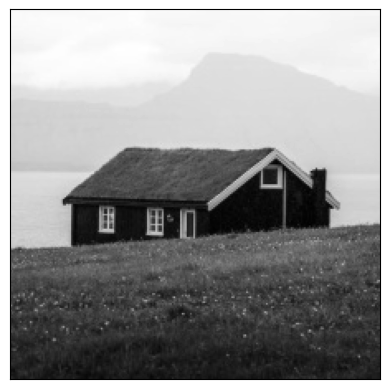

In [8]:
print("Size= "+str(testImage.shape))
fig = plt.figure()
plt.xticks([]), plt.yticks([])
plt.imshow(testImage,cmap='gray')

### 區塊切割
首先將灰階圖像由左至右由上而下掃描,分割成多個不重疊的 7 × 7 區塊

1. 將影像轉成灰階
2. 轉換成二維像素陣列
3. 分割成7 x 7大小的區塊陣列

In [9]:
pixelBlocks=[]
binaryPixelBlocks=[]
LSBBlocks=[]

In [10]:
blockWidth=int(testImage.shape[0]/7)
blockHeight=int(testImage.shape[1]/7)
blocksSize=blockWidth*blockHeight

print('原圖像素: '+str(testImage.shape))
print("區塊數量: "+str(blockWidth)+' * '+str(blockHeight))
print("總區塊數量: "+str(blocksSize))

原圖像素: (224, 224)
區塊數量: 32 * 32
總區塊數量: 1024


In [11]:
# 打印7*7的區塊
def showBlock(block):
    for row in block:
        for element in row:
            print(element,end=' ')
        print()
    print('\n-----------------------------------------\n')

In [12]:
#切分原始區塊
pixelBlocks=[]
def makeBlock(startx,starty,image):
    block=[]
    for row in range(7):
        block.append(image[startx+row][starty:starty+7])
    # showBlock(block)
    return block

for startx in range(blockWidth):
    for starty in range(blockHeight):
        pixelBlocks.append(makeBlock(starty*7,startx*7,testImage))
        
print("實際總區塊數量: "+str(len(pixelBlocks)))

實際總區塊數量: 1024


### LSB提取

1. 轉換塊像素為八位元二進制序列
2. 取得LSB
3. 儲存到LSB區塊

In [13]:
#像素轉二維陣列
binaryPixelBlocks=[]
def pixelToBinary(pixel):
    return str(bin(pixel).replace('0b','').zfill(8))

def turnBlocksToBinary(block):
    binaryPixelBlock=[]
    for row in block:
        binaryRow=[]
        for pixel in row:
            binaryRow.append(pixelToBinary(pixel))
        binaryPixelBlock.append(binaryRow)
    binaryPixelBlocks.append(binaryPixelBlock)
    # showBlock(binaryPixelBlock)

for pixelBlock in pixelBlocks:
    turnBlocksToBinary(pixelBlock)

print("二維區塊數: "+str(len(binaryPixelBlocks)))

二維區塊數: 1024


In [14]:
#取得LSB區塊
LSBBlocks=[]

def binaryToLSB(binary):
    return int(binary[-1])

def turnBinaryBlockToLSBBlock(binaryBlock):
    LSBPixelBlock=[]
    for row in binaryBlock:
        LSBRow=[]
        for binaryPixel in row:
            LSBRow.append(binaryToLSB(binaryPixel))
        LSBPixelBlock.append(LSBRow)
    LSBBlocks.append(LSBPixelBlock)
    # showBlock(LSBPixelBlock)

for binaryBlock in binaryPixelBlocks:
    turnBinaryBlockToLSBBlock(binaryBlock)

print("LSB區塊數: "+str(len(LSBBlocks)))

LSB區塊數: 1024


### 奇同位修改

1. 以列為單位將 d1、d2、d3、d4 位置的位元乘上漢明碼的生成矩陣 G
2. d1⨁d2⨁d4=1 then r1=0
3. d1⨁d3⨁d4=0 then r2=1
4. d2⨁d3⨁d4=0 then r3=1

In [15]:
# 三位元XOR運算
def XOR(a,b,c):
    string=str(a)+str(b)+str(c)
    switcher = {
        '000': 0,
        '001': 1,
        '010': 1,
        '011': 0,
        '100': 1,
        '101': 0,
        '110': 0,
        '111': 1
    }
    return switcher.get(string, 0)

In [16]:
# 一列的奇同位修改
def oddParityCheckRow(row):
    opcRow=row
    if(int(XOR(row[2],row[4],row[6]))==1):
        opcRow[0]=0
    if(int(XOR(row[2],row[5],row[6]))==0):
        opcRow[1]=1
    if(int(XOR(row[4],row[5],row[6]))==0):
        row[3]=1
    return opcRow

In [17]:
#以列為單位將 d1、d2、d3、d4 位置的位元乘上漢明碼的生成矩陣 G
G=[
    [1, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 0, 0, 1]
]

H=G[:-1]
for i in range(len(G)-1):
    for j in range(len(G[0])):
        H[i][j]=abs(H[i][j]-1)

In [18]:
# 四位元二元序列相加
def binaryAdd(a,b,c,d):
    string=str(a)+str(b)+str(c)+str(d)
    switcher = {
        '0000': 0,
        '0001': 1,
        '0010': 1,
        '0011': 0,
        '0100': 1,
        '0101': 0,
        '0110': 0,
        '0111': 1,
        '1000': 1,
        '1001': 0,
        '1010': 0,
        '1011': 1,
        '1100': 0,
        '1101': 1,
        '1110': 1,
        '1111': 0
    }
    return switcher.get(string, 0)

In [19]:
# 矩陣相乘
def matrixProduct(d1,d2,d3,d4):
    product=[]
    for i in range(len(G[0])):
        product.append(binaryAdd(d1*G[0][i],d2*G[1][i],d3*G[2][i],d4*G[3][i]))
    return product

In [20]:
#取得冗餘位元
def getRedundantBits(row):
    _m=matrixProduct(row[2],row[4],row[5],row[6])
    redundantBits=[_m[0],_m[1],_m[3]]
    return redundantBits

In [21]:
# 生成掩護圖像
def coverBlock(LSBBlock):
    # print('原始區塊: ')
    # showBlock(LSBBlock)
    for index,LSBRow in enumerate(LSBBlock):
        redundantBits=getRedundantBits(LSBBlock[index])
        LSBBlock[index][0]=redundantBits[0]
        LSBBlock[index][1]=redundantBits[1]
        LSBBlock[index][3]=redundantBits[2]
        LSBBlock[index]=oddParityCheckRow(LSBRow)
    # print('奇同位修改區塊: ')
    # showBlock(LSBBlock)

for LSBBlock in LSBBlocks:
    coverBlock(LSBBlock)

### 找尋嵌入訊息位置

1. 設定共享密鑰δ
2. 找出共享秘密位置 κi 
3. 可能位置去除共享秘密位置 κi
4. 選擇與嵌入訊息反向且不為κi的位置

In [22]:
#設定共享密鑰δ
key=3
keyIndex=key-1

In [23]:
#共享秘密位置 κi 
def getShareSecretPosition(rowIndex,lastSecretIndex,embeddedIndex):
    if(rowIndex==0):
        return int(key%7)
    else:
        return int((key*lastSecretIndex*embeddedIndex)%7)
    return 0

In [24]:
# 選擇嵌入位置
def chooseEmbeddeedIndex(row,secretPosition,message):
    indexPossible=[i for i in range(7)]
    
    #去除共享秘密位置 κi
    indexPossible.remove(secretPosition)
    
    for index,value in enumerate(row):
        if(index==secretPosition):
            continue
        if(value==message):
            indexPossible.remove(index)

    setPrefer={0,1,3}
    setindexPossible=set(indexPossible)
    if((0 in setindexPossible) or (1 in setindexPossible) or (3 in setindexPossible)):
        preferIndexPossible=setPrefer.intersection(setindexPossible)
        preferIndexPossible=list(preferIndexPossible)
        if(len(preferIndexPossible)>0):
            return random.choice(preferIndexPossible)

    if(len(indexPossible)==0):
        return secretPosition
    
    return random.choice(indexPossible)

In [25]:
# 嵌入訊息
def embeddLSBBlock(LSBBlock,message):
    lastSecretIndex=0
    embeddedIndex=0
    for index,row in enumerate(LSBBlock):
        lastSecretIndex=getShareSecretPosition(index,lastSecretIndex,embeddedIndex)
        #翻轉位元
        row[lastSecretIndex]=abs(int(row[lastSecretIndex])-1)
        embeddedIndex=chooseEmbeddeedIndex(row,lastSecretIndex,int(message[index]))
        row[embeddedIndex]=message[index]

In [26]:
for index,LSBBlock in enumerate(LSBBlocks):
    embeddLSBBlock(LSBBlock,getACharMessage(message,index))

### 區塊復原

1. 用LSB區塊修改二元序列區塊的最後一個位元
2. 二元序列區塊還原成十進制像素區塊
3. 像素區塊更新

In [27]:
#LSB區塊修改二元序列區塊的最後一個位元
def reviseBinaryBlock(index):
    binaryBlock=binaryPixelBlocks[index]
    LSBBlock=LSBBlocks[index]
    # showBlock(binaryBlock)
    for blockRowIndex in range(7):
        binaryBlockRow=binaryBlock[blockRowIndex]
        LSBBlockRow=LSBBlock[blockRowIndex]
        for elementIndex in range(7):
            binaryBlockRow[elementIndex]=binaryBlockRow[elementIndex][:-1]+str(LSBBlockRow[elementIndex])
        binaryBlock[blockRowIndex]=binaryBlockRow
    binaryPixelBlocks[index]=binaryBlock
    # showBlock(binaryBlock)      

In [28]:
for index in range(blocksSize):
    reviseBinaryBlock(index)

In [29]:
# 二元序列區塊還原成十進制像素區塊
def revisePixelBlock(index):
    binaryBlock=binaryPixelBlocks[index]
    pixelBlock=pixelBlocks[index]
    # showBlock(pixelBlock)
    for blockRowIndex in range(7):
        binaryBlockRow=binaryBlock[blockRowIndex]
        BlockRow=pixelBlock[blockRowIndex]
        for elementIndex in range(7):
            BlockRow[elementIndex]=int(binaryBlockRow[elementIndex],2) 
        pixelBlock[blockRowIndex]=BlockRow
    pixelBlocks[index]=pixelBlock
    # showBlock(pixelBlock)   

In [30]:
for index in range(blocksSize):
    revisePixelBlock(index)

### 區塊復原到像素

In [31]:
# 將區塊復原到隱藏訊息影像陣列
def putPixelBlockBack(startx,starty,pixelBlock,hidedImage):
    for i in range(7):
        for j in range(7):
            hidedImage[starty*7+j][startx*7+i]=pixelBlock[j][i]

In [32]:
# 建立空影像
hidedImage=[]
for index in range(224):
    row=[225 for i in range(224)]
    hidedImage.append(row)

In [33]:
for index,block in enumerate(pixelBlocks):
    putPixelBlockBack(int(index/32),int(index%32),block,hidedImage)

### 儲存影藏訊息陣列成圖像

In [34]:
# 儲存隱藏訊息圖像
def storeImage(hidedImage,path):
    hidedImage=pd.DataFrame(hidedImage)
    cv2.imwrite(path,hidedImage.to_numpy())

In [35]:
storeImage(hidedImage,'../images/LennaPaperHide.jpg')

### PSNR
峰值訊噪比是一個表示訊號最大可能功率和影響它的表示精度的破壞性雜訊功率的比值的工程術語

In [36]:
# 計算 psnr
def psnr(originImage,hidedImage):
   diffrence = originImage-hidedImage
   mse = np.mean(np.square(diffrence))
   psnr = 10 * np.log10(255 * 255 / mse)
   return(psnr)

In [37]:
hidedImage = cv2.imread('../images/LennaPaperHide.jpg')
hidedImage = cv2.cvtColor(hidedImage,cv2.COLOR_BGR2GRAY) 

print('psnr= '+str(psnr(testImage,hidedImage))) #57

psnr= 52.75354603858431


### 相對熵 
又稱 KL散度（Kullback-Leibler divergence，簡稱KLD）

reference: https://blog.csdn.net/sihaiyinan/article/details/112196356

In [38]:
def hxx_forward(x, y):
    return skm.mutual_info_score(x, y)

In [39]:
def hxx(x, y):
    size = x.shape[-1]
    px = np.histogram(x, 256, (0, 255))[0] / size
    py = np.histogram(y, 256, (0, 255))[0] / size
    hx = - np.sum(px * np.log(px + 1e-8))
    hy = - np.sum(py * np.log(py + 1e-8))
 
    hxy = np.histogram2d(x, y, 256, [[0, 255], [0, 255]])[0]
    hxy /= (1.0 * size)
    hxy = - np.sum(hxy * np.log(hxy + 1e-8))
 
    r = hx + hy - hxy
    return r

In [40]:
x = np.reshape(hidedImage, -1)
y = np.reshape(testImage, -1)
 
print("相對熵= "+str(hxx_forward(x, y)))

相對熵= 4.2381380559901265
